<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/MichailSeth_E5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

Exercise 9.5: Singular values  
Generate an $n × n$ matrix, denoted by $C$, where each entry is 1 with probability $p$, and 0 otherwise. Use the linear algebra library of Scipy to compute the singular values of $C$. What can you say about the
relationship between $n$, $p$ and the largest singular value?

In [2]:
n = 5
p = np.random.uniform(0,1)
C = np.multiply(np.ones((n,n)),np.random.normal(0,1,(n,n))<p)
#mask = (np.random.rand(*C.shape) < p)
print(C)

[[1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1.]]


In [3]:
U,s,V = np.linalg.svd(C)
print(s)

[3.52923713e+00 1.57106021e+00 9.19455492e-01 4.80475496e-01
 4.55599897e-17]


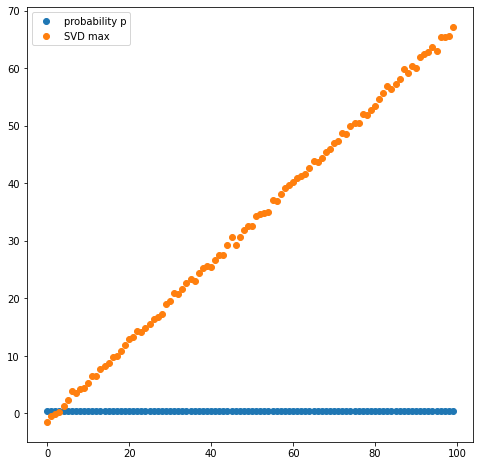

In [130]:
z = np.zeros((100,3))
for i in range(100):
  n=i+1
  p = 0.5
  C = np.multiply(np.ones((n,n)),np.random.normal(0,1,(n,n))<p)
  U,s,V = np.linalg.svd(C)
  z[i,0] = i
  z[i,1] = p
  z[i,2] = np.amax(s) -2.5

plt.scatter(z[:,0], z[:,1],label="probability p")
plt.scatter(z[:,0], z[:,2],label="SVD max")
plt.legend()

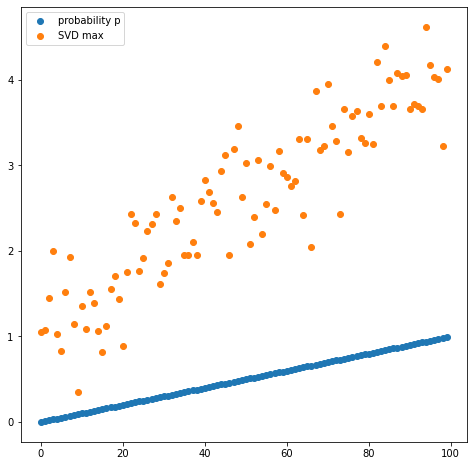

In [129]:
z = np.zeros((100,3))
n =10
for i in range(100):
  p = i/100  
  C = np.multiply(np.ones((n,n)),np.random.normal(0,1,(n,n))<p)
  U,s,V = np.linalg.svd(C)
  z[i,0] = i
  z[i,1] = p
  z[i,2] = np.amax(s) -4.5

plt.scatter(z[:,0], z[:,1],label="probability p")
plt.scatter(z[:,0], z[:,2],label="SVD max")
plt.legend()

10 Scipy  

Exercise 10.1: Least squares  
Generate matrix $A ∈ R^{m×n}$ with $m > n$. Also generate some vector $b ∈ R^m$.  
Now find $$x = \text{arg} \min_{x} \|Ax − b\|_2$$.
Print the norm of the residual.
<!--- should it be superscript 2?--->


In [6]:
n = np.random.randint(1,20)
A = np.random.normal(0,1,size=(n+1,n))
b = np.random.normal(0,1,size=n+1)
s = sp.linalg.lstsq(A,b)
plt.plot(s)

Exercise 10.2: Optimization  
Find the maximum of the function  
$f(x) = sin^2(x − 2)e^{−x^2}$



In [7]:
sp.optimize.maximize?

Object `sp.optimize.maximize` not found.


In [18]:
def f(x): 
  xexp = np.exp(-x**2)  #scipy.exp is deprecated, must use numpy.exp instead
  xsin = np.sin(x-2)**2 #scipy.sin is deprecated, must use numpy.sin instead
  return xsin*xexp
fmax = sp.optimize.fmin(lambda x: -f(x), 0)
print(fmax)

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


Exercise 10.3: Pairwise distances  
Let $X$ be a matrix with $n$ rows and $m$ columns. How can you compute the pairwise distances between
every two rows?  
As an example application, consider n cities, and we are given their coordinates in two columns. Now
we want a nice table that tells us for each two cities, how far they are apart.  
Again, make sure you make use of Scipy’s functionality instead of writing your own routine.

In [13]:
n,m = 15,5
PX = np.random.randint(0,10,size=n*m).reshape(n,m)
print(PX,'\n')
#scipy's built-in for pairwise distances
d = sp.spatial.distance.pdist(PX)
d

(15, 5)


array([ 2.64575131,  7.07106781, 13.        , 12.56980509,  7.93725393,
        6.8556546 ,  8.1240384 ,  9.53939201, 10.77032961,  8.48528137,
       11.53256259,  9.69535971,  6.8556546 ,  9.94987437,  6.8556546 ,
       13.19090596, 12.28820573,  8.83176087,  8.        ,  8.42614977,
        8.60232527, 11.78982612,  9.21954446, 11.04536102,  9.32737905,
        8.60232527, 11.13552873, 12.60952021, 12.24744871, 10.72380529,
       10.81665383,  6.78232998,  9.21954446, 10.29563014, 13.7113092 ,
        9.53939201, 11.13552873, 11.87434209, 14.38749457,  6.70820393,
        6.4807407 , 11.83215957,  8.18535277,  7.07106781,  6.08276253,
       11.78982612,  6.        ,  9.53939201, 11.5758369 , 10.39230485,
        7.68114575,  9.74679434,  7.74596669,  4.79583152, 10.86278049,
       13.85640646,  5.91607978,  6.78232998, 13.37908816,  9.74679434,
        6.78232998,  6.40312424,  6.78232998,  6.55743852,  7.        ,
        8.36660027,  6.8556546 ,  6.4807407 ,  5.29150262,  9.43

11 Matplotlib  

Exercise 11.1: Plotting a function  
Plot the function
$f(x) = sin^2(x − 2)e^{−x^2}$
over the interval [0, 2]. Add proper axis labels, a title, etc.

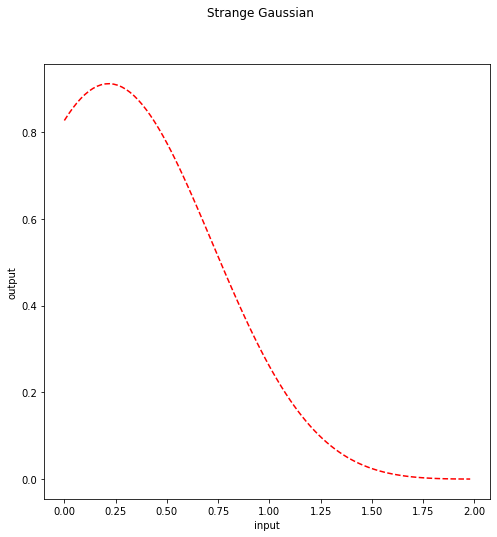

In [128]:
# red dashes, blue squares and green triangles
#f(x) as before
z = np.arange(0.0, 2.0, 0.02)
plt.plot(z, f(z), 'r--')
plt.xlabel('input')
plt.ylabel('output')
plt.suptitle('Strange Gaussian')
plt.show()

Exercise 11.2: Data  
Create a data matrix $X$ with 20 observations of 10 variables. Generate a vector $b$ with parameters Then
generate the response vector $y = Xb+z$ where $z$ is a vector with standard normally distributed variables.
Now (by only using $y$ and $X$), find an estimator for $b$, by solving
$$\hat{b} = \text{arg} \min_{b} \|Xb − y\|^2$$
Plot the true parameters $b$ and estimated parameters $\hat{b}$. See Figure 1 for an example plot.

$xb=(X^TX)^{-1}$  
$xy=X^Ty$  
$\hat{b}=xb\cdot xy$  
  
Justified by the derivation that follows  
$||Xb - y||^2_2 = (Xb - y)^T(Xb - y)  $  
$\hspace {47.5pt}   = (b^TX^T - y^T)(Xb - y)$  
$\hspace {47.5pt} = b^TX^TXb − b^TX^Ty − y^TXb + y^Ty$  
$\hspace {47.5pt} = b^TX^TXb − 2y^TXb + y^Ty $    

Generally,  
$\hspace {17pt}∇_βa^Tβ = a$  
$\hspace {9pt}∇_ββ^TAβ = 2Aβ$  
  
Applying this yeilds  
$∇_b||Xb - y||^2_2 = ∇_b(b^TX^TXb − 2y^TXb + y^Ty)$  
$\hspace {60pt}= ∇_bb^TAb − ∇_b2a^Tb + ∇_by^Ty$  
$\hspace {60pt}= 2Ab −2ab + 0$  
$\hspace {60pt}= 2X^TXb − 2X^Ty$  

Finally, set to zero  
$∇_b||Xb - y||^2_2 = 0$  
$\hspace {6pt}  \implies  X^TXb = X^Ty $  
$\hspace {6pt} \implies \hspace {23pt} b = (X^TX)^{-1}X^Ty$

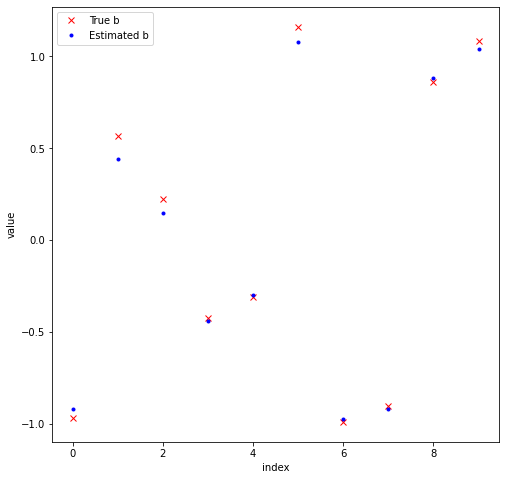

In [127]:
def estfunc(X, y):
  xb = np.linalg.inv(np.dot(X.T, X))
  xy = np.dot(X.T, y) 
  return np.dot(xb, xy)  

vert = np.arange(0.0, 10.0, 1.0)
X = np.random.randint(-10,10,size=20*10).reshape(20,10)
b = np.random.uniform(-2.0, 2.0, 10)
z = np.random.normal(0.0,1.0,size=20)
y = np.dot(X, b) + z
b_hat = estfunc(X, y)


plt.plot(vert, b, 'rx', label='True b')
plt.plot(vert, b_hat, 'b.', label='Estimated b')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

In [82]:
print(b,'\n')
print(b_hat)

[ 0.11039558  1.76559347  0.14877024 -1.07811847  1.51052642  0.92953542
 -1.80690245 -1.55822699 -1.91709565  0.99782762] 

[ 0.1175532   1.7199263   0.1652755  -1.11903803  1.47911215  1.0449345
 -1.94639729 -1.60694752 -2.06281188  0.9040246 ]



Exercise 11.3: Histogram and density estimation  
Generate a vector $z$ of 10000 observations from your favorite exotic distribution. Then make a plot that
shows a histogram of $z$ (with 25 bins), along with an estimate for the density, using a Gaussian kernel
density estimator (see scipy.stats). See Figure 2 for an example plot.


In [ ]:
#scipy.stats.describe(a, axis=0, ddof=1, bias=True, nan_policy='propagate') --> numobs, minmax, mean, varieance, skew, kurtosis
#

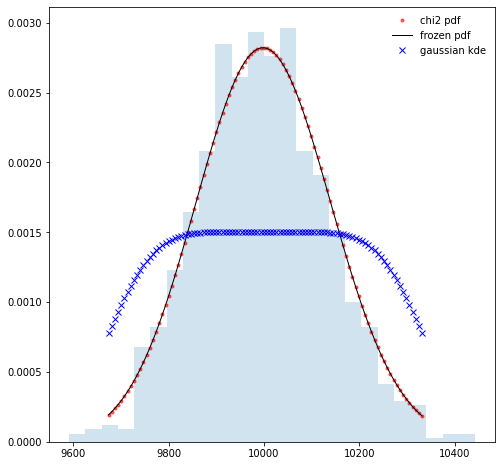

In [126]:
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
#from matplotlib.pyplot import figure
#figure(figsize=(28, 6), dpi=80)
plt.rcParams["figure.figsize"] = (8,8)
fig, ax = plt.subplots(1, 1)

#Calculate the first four moments:

df = 10000
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r.', lw=2, alpha=0.6, label='chi2 pdf')

#Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
#This returns a “frozen” RV object holding the given parameters fixed. Freeze the distribution and display the frozen pdf:

rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')
gkd = gkde(x)
ax.plot(x, gkd.evaluate(x), 'bx', lw=1, label='gaussian kde')
#Check accuracy of cdf and ppf:

vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))
vals

#Generate random numbers:

r = chi2.rvs(df, size=1000)

#And compare the histogram:

ax.hist(r, bins=25, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
